In [2]:
"""
    2.3.3 线性模型
    线性模型利用输入特征的线性函数（linear function）进行预测。
    用于回归的线性模型，对于回归问题，线性模型预测的一般公式如下：
    ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b
    
    这里 x[0] 到 x[p] 表示单个数据点的特征（本例中特征个数为 p+1），w 和 b 是学习模型的参数，ŷ 是模型的预测结果。
    对于单一特征的数据集，公式如下： ŷ = w[0] * x[0] + b
    
    这就是高中数学里的直线方程。这里 w[0] 是斜率，b 是 y 轴偏移。
    
    或者，你也可以将预测的响应值看作输入特征的加权求和，权重由 w 的元素给出（可以取负值）。
"""

'\n    2.3.3 线性模型\n    线性模型利用输入特征的线性函数（linear function）进行预测。\n    用于回归的线性模型，对于回归问题，线性模型预测的一般公式如下：\n    ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b\n    \n    这里 x[0] 到 x[p] 表示单个数据点的特征（本例中特征个数为 p+1），w 和 b 是学习模型的参数，ŷ 是模型的预测结果。\n    对于单一特征的数据集，公式如下： ŷ = w[0] * x[0] + b\n    \n    这就是高中数学里的直线方程。这里 w[0] 是斜率，b 是 y 轴偏移。\n    \n    或者，你也可以将预测的响应值看作输入特征的加权求和，权重由 w 的元素给出（可以取负值）。\n'

C:\Users\songlk2\AppData\Local\Temp\ipykernel_12912\3948019986.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


w[0]: 0.393906  b: -0.031804


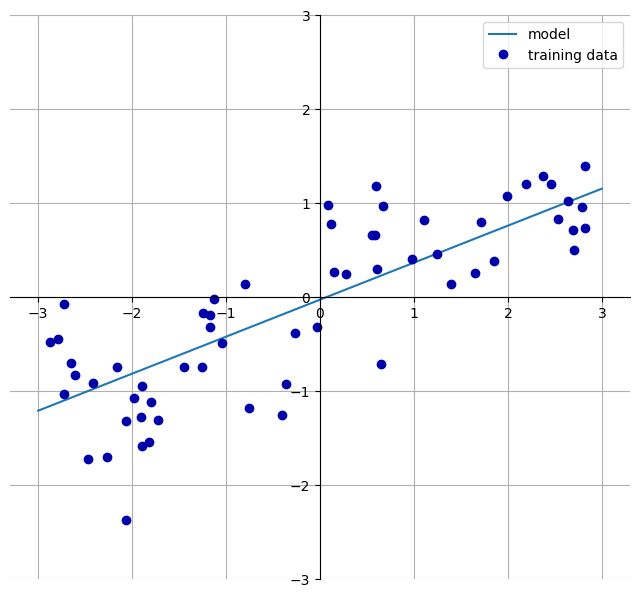

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn

mglearn.plots.plot_linear_regression_wave()

In [4]:
"""
    从 w[0] 可以看出，斜率应该在 0.4 左右。
    截距是指预测直线与 y 轴的交点：比 0 略小。
    用于回归的线性模型可以表示为这样的回归模型：
        对单一特征的预测结果是一条直线，
        两个特征时是一个平面，
        或者在更高维度（即更多特征）时是一个超平面。
"""
"""
    将直线的预测结果与图 2-10 中 KNeighborsRegressor 的预测结果进行比较，会发现直线的预测能力非常受限。似乎数据的所有细节都丢失了。
    从某种意义上来说，这种说法是正确的。假设目标 y 是特征的线性组合，这是一个非常强的（也有点不现实的）假设。
    但观察一维数据得出的观点有些片面。
    对于有多个特征的数据集而言，线性模型可以非常强大。
    特别地，如果特征数量大于训练数据点的数量，任何目标 y 都可以（在训练集上）用线性函数完美拟合。
"""
"""
    有许多不同的线性回归模型。这些模型之间的区别在于如何从训练数据中学习参数 w 和 b，以及如何控制模型复杂度。
"""

'\n    有许多不同的线性回归模型。这些模型之间的区别在于如何从训练数据中学习参数 w 和 b，以及如何控制模型复杂度。\n'

In [5]:
"""
    1.线性回归（又名普通最小二乘法）
    线性回归，或者普通最小二乘法（ordinary least squares，OLS）.
    线性回归寻找参数 w 和 b，使得对训练集的 预测值 与 真实的回归目标值 y 之间的均方误差最小。
    
    均方误差（mean squared error）是 预测值 与 真实值 之差 的 平方和 除以 样本数。
    线性回归没有参数，这是一个优点，但也因此无法控制模型的复杂度。
"""

'\n    1.线性回归（又名普通最小二乘法）\n    线性回归，或者普通最小二乘法（ordinary least squares，OLS）.\n    线性回归寻找参数 w 和 b，使得对训练集的 预测值 与 真实的回归目标值 y 之间的均方误差最小。\n    \n    均方误差（mean squared error）是 预测值 与 真实值 之差 的 平方和 除以 样本数。\n    线性回归没有参数，这是一个优点，但也因此无法控制模型的复杂度。\n'

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


lr = LinearRegression().fit(X_train, y_train)
"""
    “斜率”参数（w，也叫作权重或系数）被保存在 coef_ 属性中，而偏移或截距（b）被保存在 intercept_ 属性中
"""
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

"""
    你可能注意到了 coef_ 和 intercept_ 结尾处奇怪的下划线。
    scikit-learn总是将从训练数据中得出的值保存在以下划线结尾的属性中。这是为了将其与用户设置的参数区分开。
"""
"""
    intercept_ 属性是一个浮点数，而 coef_ 属性是一个 NumPy 数组，每个元素对应一个输入特征。
    由于 wave 数据集中只有一个输入特征，所以 lr.coef_ 中只有一个元素。
"""

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


'\n    intercept_ 属性是一个浮点数，而 coef_ 属性是一个 NumPy 数组，每个元素对应一个输入特征。\n    由于 wave 数据集中只有一个输入特征，所以 lr.coef_ 中只有一个元素。\n'

In [7]:
"""
    来看一下训练集和测试集的性能：
"""
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
"""
    R^2 分数也叫作决定系数，是回归模型预测的优度度量，位于 0 到 1 之间。
    R^2 等于 1 对应完美预测，R^2 等于 0 对应常数模型，即总是预测训练集响应（y_train）的平均值。
    在线性回归模型中,决定系数R^2衡量了模型对数据的拟合程度。训练集和测试集的R^2值之间的差异程度可以反映欠拟合和过拟合问题。具体来说:
        训练集和测试集R^2值接近,说明模型对已知数据(训练集)和未知数据(测试集)的拟合能力相当,这通常意味着模型没有过度拟合也没有欠拟合,模型的复杂度与数据分布是比较匹配的。
    
        训练集(Train)R^2值很高,但测试集(Test)R^2值明显低于训练集,这表示模型 过于拟合 了训练数据,捕捉了训练数据中的噪声和细节。这种情况下,模型在训练集上表现很好,但在测试集(未知数据)上泛化能力差。这种现象称为 过拟合。
        
        训练集和测试集R^2值都偏低,且相差不大,说明模型的复杂度不够,无法有效拟合数据的潜在规律,属于 欠拟合 情况。这种情况下,模型在训练集和测试集上的拟合能力都较差。
"""
"""
    R^2 约为 0.66，这个结果不是很好，但我们可以看到，训练集和测试集上的分数非常接近。
    这说明可能存在欠拟合，而不是过拟合。
    对于这个一维数据集来说，过拟合的风险很小，因为模型非常简单（或受限）。
    然而，对于更高维的数据集（即有大量特征的数据集），线性模型将变得更加强大，过拟合的可能性也会变大。
"""

Training set score: 0.67
Test set score: 0.66


'\n    R^2 约为 0.66，这个结果不是很好，但我们可以看到，训练集和测试集上的分数非常接近。\n    这说明可能存在欠拟合，而不是过拟合。\n    对于这个一维数据集来说，过拟合的风险很小，因为模型非常简单（或受限）。\n    然而，对于更高维的数据集（即有大量特征的数据集），线性模型将变得更加强大，过拟合的可能性也会变大。\n'

In [8]:
"""
    来看一下 LinearRegression 在更复杂的数据集上的表现，比如波士顿房价数据集。
    记住，这个数据集有 506 个样本和 105个导出特征。
    首先，加载数据集并将其分为训练集和测试集。
    然后像前面一样构建线性回归模型。
"""
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

"""
    比较一下训练集和测试集的分数就可以发现，我们在训练集上的预测非常准确，但测试集上的 R2 要低很多。
"""
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [9]:
"""
    训练集和测试集之间的性能差异是过拟合的明显标志，因此我们应该试图找到一个可以控制复杂度的模型。
    标准线性回归最常用的替代方法之一就是岭回归（ridge regression）。
"""

'\n    训练集和测试集之间的性能差异是过拟合的明显标志，因此我们应该试图找到一个可以控制复杂度的模型。\n    标准线性回归最常用的替代方法之一就是岭回归（ridge regression）。\n'

In [10]:
"""
    2.岭回归（ridge regression）
    岭回归也是一种用于回归的线性模型，因此它的预测公式与普通最小二乘法相同。
    在岭回归中，对系数（w）的选择不仅要在训练数据上得到好的预测结果，而且还要拟合附加约束。
    我们还希望系数尽量小。 
    换句话说，w 的所有元素都应接近于 0。
    直观上来看，这意味着每个特征对输出的影响应尽可能小（即斜率很小），同时仍给出很好的预测结果。
    这种约束是所谓正则化（regularization）的一个例子。
"""
"""
    正则化是指对模型做显式约束，以避免过拟合。
    岭回归用到的这种被称为 L2 正则化。
"""
"""
    岭回归在 linear_model.Ridge 中实现。来看一下它对扩展的波士顿房价数据集的效果如何:
"""
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
"""
    Ridge 在训练集上的分数要低于 LinearRegression，但在测试集上的分数更高。
    线性回归对数据存在过拟合。
    Ridge 是一种约束更强的模型，所以更不容易过拟合。
    复杂度更小的模型意味着在训练集上的性能更差，但泛化性能更好。
"""


Training set score: 0.89
Test set score: 0.75


'\n    Ridge 在训练集上的分数要低于 LinearRegression，但在测试集上的分数更高。\n    线性回归对数据存在过拟合。\n    Ridge 是一种约束更强的模型，所以更不容易过拟合。\n    复杂度更小的模型意味着在训练集上的性能更差，但泛化性能更好。\n'

In [11]:
"""
    Ridge 模型在 模型的简单性 （系数都接近于 0）与 训练集性能 之间做出权衡。
    简单性 和 训练集性能 二者对于模型的重要程度可以由用户通过设置 alpha 参数来指定。
    在前面的例子中，我们用的是默认参数 alpha=1.0。但没有理由认为这会给出最佳权衡。
    alpha 的最佳设定值取决于用到的具体数据集。
    增大 alpha 会使得系数更加趋向于 0，从而降低训练集性能，但可能会提高泛化性能。
"""
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [12]:
"""
    减小 alpha 可以让系数受到的限制更小，即在图 2-1 中向右移动。
    对于非常小的 alpha 值，系数几乎没有受到限制，我们得到一个与 LinearRegression 类似的模型.
"""
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
"""
    这里 alpha=0.1 似乎效果不错。
"""

Training set score: 0.93
Test set score: 0.77


'\n    这里 alpha=0.1 似乎效果不错。\n'

'\n    这里 x 轴对应 coef_ 的元素：\n        x=0 对应第一个特征的系数，x=1 对应第二个特征的系数，以此类推，一直到 x=100。\n        y 轴表示该系数的具体数值。\n    这里需要记住的是，对于 alpha=10，系数大多在 -3 和 3 之间。\n    对于 alpha=1 的 Ridge 模型，系数要稍大一点。\n    对于 alpha=0.1，点的范围更大。\n    对于没有做正则化的线性回归（即 alpha=0），点的范围很大，许多点都超出了图像的范围。\n'

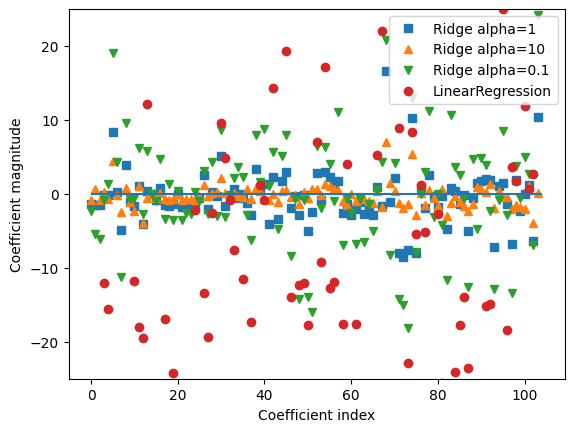

In [13]:
"""
    我们还可以查看 alpha 取不同值时模型的 coef_ 属性，从而更加定性地理解 alpha 参数是如何改变模型的。
    更大的 alpha 表示约束更强的模型，所以我们预计大 alpha 对应的 coef_ 元素比小 alpha 对应的 coef_ 元素要小。
    (大alpha的w系数更小，小alpha的w系数更大)
"""
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
"""
    这里 x 轴对应 coef_ 的元素：
        x=0 对应第一个特征的系数，x=1 对应第二个特征的系数，以此类推，一直到 x=100。
        y 轴表示该系数的具体数值。
    这里需要记住的是，对于 alpha=10，系数大多在 -3 和 3 之间。
    对于 alpha=1 的 Ridge 模型，系数要稍大一点。
    对于 alpha=0.1，点的范围更大。
    对于没有做正则化的线性回归（即 alpha=0），点的范围很大，许多点都超出了图像的范围。
"""

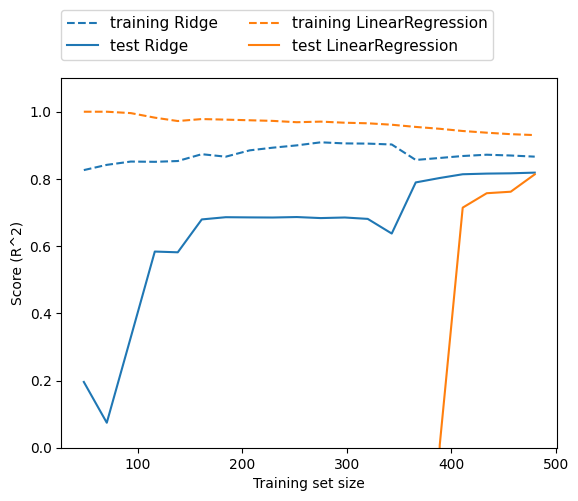

In [14]:
"""
    还有一种方法可以用来理解正则化的影响，就是固定 alpha 值，但改变训练数据量。
    我们对波士顿房价数据集做二次抽样，并在数据量逐渐增加的子数据集上分别对 LinearRegression 和 Ridge(alpha=1) 两个模型进行评估
    （将模型性能作为数据集大小的函数进行绘图，这样的图像叫作学习曲线）
"""

mglearn.plots.plot_ridge_n_samples()


In [15]:
"""
    正如所预计的那样，无论是岭回归还是线性回归，所有数据集大小对应的训练分数都要高于测试分数。
    由于岭回归是正则化的，因此它的训练分数要整体低于线性回归的训练分数。
    但岭回归的测试分数要更高，特别是对较小的子数据集。
    
    如果少于 400 个数据点，线性回归学不到任何内容。
    随着模型可用的数据越来越多，两个模型的性能都在提升，最终线性回归的性能追上了岭回归。
    
    这里要记住的是，如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归将具有相同的性能
    （在这个例子中，二者相同恰好发生在整个数据集的情况下，这只是一个巧合）。
    
    图中还有一个有趣之处，就是线性回归的训练性能在下降。
    如果添加更多数据，模型将更加难以过拟合或记住所有的数据。
"""

'\n    正如所预计的那样，无论是岭回归还是线性回归，所有数据集大小对应的训练分数都要高于测试分数。\n    由于岭回归是正则化的，因此它的训练分数要整体低于线性回归的训练分数。\n    但岭回归的测试分数要更高，特别是对较小的子数据集。\n    \n    如果少于 400 个数据点，线性回归学不到任何内容。\n    随着模型可用的数据越来越多，两个模型的性能都在提升，最终线性回归的性能追上了岭回归。\n    \n    这里要记住的是，如果有足够多的训练数据，正则化变得不那么重要，并且岭回归和线性回归将具有相同的性能\n    （在这个例子中，二者相同恰好发生在整个数据集的情况下，这只是一个巧合）。\n    \n    图中还有一个有趣之处，就是线性回归的训练性能在下降。\n    如果添加更多数据，模型将更加难以过拟合或记住所有的数据。\n'

In [16]:
"""
    4. lasso
    另一种正则化的线性回归是 Lasso。
    与岭回归相同，使用 lasso 也是约束系数使其接近于 0，但用到的方法不同，叫作 L1 正则化。
    
    L1 正则化的结果是，使用 lasso 时某些系数刚好为 0。
    这说明某些特征被模型完全忽略。这可以看作是一种自动化的特征选择。
    某些系数刚好为 0，这样模型更容易解释，也可以呈现模型最重要的特征。
"""
"""
    我们将 lasso 应用在扩展的波士顿房价数据集上：
"""
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
"""
    Lasso 在训练集与测试集上的表现都很差。
    这表示存在欠拟合，我们发现模型只用到了 105 个特征中的 4 个。
"""

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


'\n    Lasso 在训练集与测试集上的表现都很差。\n    这表示存在欠拟合，我们发现模型只用到了 105 个特征中的 4 个。\n'

In [17]:
"""
    与 Ridge 类似，Lasso 也有一个正则化参数 alpha，可以控制系数趋向于 0 的强度。
    在上一个例子中，我们用的是默认值 alpha=1.0。
    
    为了降低欠拟合，我们尝试减小 alpha。
    这么做的同时，我们还需要增加 max_iter 的值（运行迭代的最大次数）
"""
# 我们增大max_iter的值，否则模型会警告我们，说应该增大max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))
"""
    alpha 值变小，我们可以拟合一个更复杂的模型，在训练集和测试集上的表现也更好。
    模型性能比使用 Ridge 时略好一点，而且我们只用到了 105 个特征中的 33 个。
    这样模型可能更容易理解。
"""

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


'\n    alpha 值变小，我们可以拟合一个更复杂的模型，在训练集和测试集上的表现也更好。\n    模型性能比使用 Ridge 时略好一点，而且我们只用到了 105 个特征中的 33 个。\n    这样模型可能更容易理解。\n'

In [18]:
"""
    但如果把 alpha 设得太小，那么就会消除正则化的效果，并出现过拟合，得到与LinearRegression 类似的结果。
"""
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

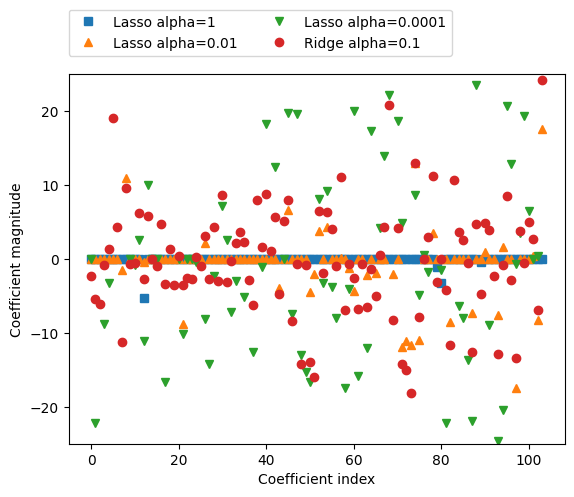

In [19]:
"""
    对不同模型的系数进行作图
"""
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [20]:
"""
    在 alpha=1 时，我们发现不仅大部分系数都是 0（我们已经知道这一点），而且其他系数也都很小。
    将 alpha 减小至 0.01，我们得到图中向上的三角形，大部分特征等于 0。
    alpha=0.0001 时，我们得到正则化很弱的模型，大部分系数都不为 0，并且还很大。
    
    
    为了便于比较，图中用圆形表示 Ridge 的最佳结果。
    alpha=0.1 的 Ridge 模型的预测性能与 alpha=0.01 的 Lasso 模型类似，但 Ridge 模型的所有系数都不为 0。
"""

'\n    在 alpha=1 时，我们发现不仅大部分系数都是 0（我们已经知道这一点），而且其他系数也都很小。\n    将 alpha 减小至 0.01，我们得到图中向上的三角形，大部分特征等于 0。\n    alpha=0.0001 时，我们得到正则化很弱的模型，大部分系数都不为 0，并且还很大。\n    \n    \n    为了便于比较，图中用圆形表示 Ridge 的最佳结果。\n    alpha=0.1 的 Ridge 模型的预测性能与 alpha=0.01 的 Lasso 模型类似，但 Ridge 模型的所有系数都不为 0。\n'

In [21]:
"""
    在实践中，在两个模型中一般首选岭回归。
    但如果特征很多，你认为只有其中几个是重要的，那么选择 Lasso 可能更好。
    
    同样，如果你想要一个容易解释的模型，Lasso 可以给出更容易理解的模型，因为它只选择了一部分输入特征。
    scikit-learn 还提供了 ElasticNet类，结合了 Lasso 和 Ridge 的惩罚项。
    在实践中，这种结合的效果最好，不过代价是要调节两个参数：一个用于 L1 正则化，一个用于 L2 正则化。
"""

'\n    在实践中，在两个模型中一般首选岭回归。\n    但如果特征很多，你认为只有其中几个是重要的，那么选择 Lasso 可能更好。\n    \n    同样，如果你想要一个容易解释的模型，Lasso 可以给出更容易理解的模型，因为它只选择了一部分输入特征。\n    scikit-learn 还提供了 ElasticNet类，结合了 Lasso 和 Ridge 的惩罚项。\n    在实践中，这种结合的效果最好，不过代价是要调节两个参数：一个用于 L1 正则化，一个用于 L2 正则化。\n'

In [22]:
"""
    5. 用于分类的线性模型
    线性模型也广泛应用于分类问题。我们首先来看二分类。这时可以利用下面的公式进行预测：
    ŷ = w[0] * x[0] + w[1] * x[1] + …+ w[p] * x[p] + b > 0
    这个公式看起来与线性回归的公式非常相似，但我们没有返回特征的加权求和，而是为预测设置了阈值（0）。
        如果函数值小于  0，我们就预测类别 -1；
        如果函数值大于 0，我们就预测类别 +1。
    
    对于所有用于分类的线性模型，这个预测规则都是通用的。    
    同样，有很多种不同的方法来找出系数（w）和截距（b）。
"""

"""
    对于用于 回归 的线性模型，输出 ŷ 是特征的线性函数，是直线、平面或超平面（对于更高维的数据集）。
    对于用于 分类 的线性模型，决策边界(分界线)是输入的线性函数。
    换句话说，（二元）线性分类器是利用直线、平面或超平面来分开两个类别的分类器。
"""

"""
    学习线性模型有很多种算法。这些算法的区别在于以下两点：
        • 系数和截距的特定组合对训练数据拟合好坏的度量方法；
        • 是否使用正则化，以及使用哪种正则化方法。
        
    不同的算法使用不同的方法来度量“对训练集拟合好坏”。
    由于数学上的技术原因，不可能调节 w 和 b 使得算法产生的误分类数量最少。
    对于我们的目的，以及对于许多应用而言，上面第一点（称为损失函数）的选择并不重要。
"""

'\n    学习线性模型有很多种算法。这些算法的区别在于以下两点：\n        • 系数和截距的特定组合对训练数据拟合好坏的度量方法；\n        • 是否使用正则化，以及使用哪种正则化方法。\n        \n    不同的算法使用不同的方法来度量“对训练集拟合好坏”。\n    由于数学上的技术原因，不可能调节 w 和 b 使得算法产生的误分类数量最少。\n    对于我们的目的，以及对于许多应用而言，上面第一点（称为损失函数）的选择并不重要。\n'

D:\Leecoin\Python\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\Leecoin\Python\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'\n     在这张图中，forge 数据集的第一个特征位于 x 轴，第二个特征位于 y 轴，与前面相同。\n     图中分别展示了 LinearSVC 和 LogisticRegression 得到的决策边界，都是直线，将顶部归为类别 1 的区域和底部归为类别 0 的区域分开了。\n     换句话说，对于每个分类器而言，位于黑线上方的新数据点都会被划为类别 1，而在黑线下方的点都会被划为类别 0。\n     \n     两个模型得到了相似的决策边界。注意，两个模型中都有两个点的分类是错误的。\n     两个模型都默认使用 L2 正则化，就像 Ridge 对回归所做的那样。\n'

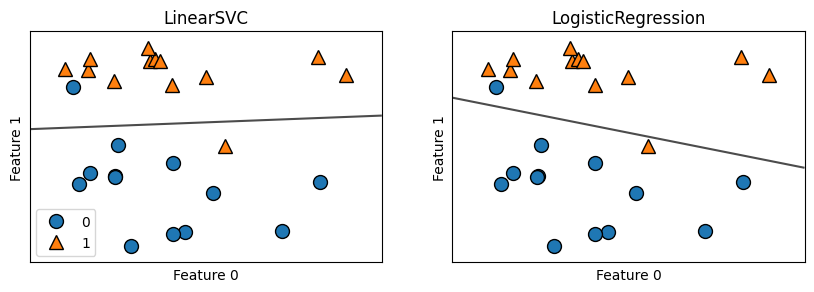

In [23]:
"""
    最常见的两种线性分类算法是 Logistic 回归（logistic regression）和 线性支持向量机（linear support vector machine，线性 SVM），
    前者在 linear_model.LogisticRegression 中实现，后者在 svm.LinearSVC（SVC 代表支持向量分类器）中实现。
    虽然 LogisticRegression的名字中含有回归（regression），但它是一种分类算法，并不是回归算法，不应与 LinearRegression 混淆。
    
    我们可以将 LogisticRegression 和 LinearSVC 模型应用到 forge 数据集上，并将线性模型找到的决策边界可视化：
"""
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC 
X, y = mglearn.datasets.make_forge() 
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) 
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
     clf = model.fit(X, y) 
     mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, 
     ax=ax, alpha=.7) 
     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
     ax.set_title("{}".format(clf.__class__.__name__)) 
     ax.set_xlabel("Feature 0") 
     ax.set_ylabel("Feature 1") 
axes[0].legend()
"""
     在这张图中，forge 数据集的第一个特征位于 x 轴，第二个特征位于 y 轴，与前面相同。
     图中分别展示了 LinearSVC 和 LogisticRegression 得到的决策边界，都是直线，将顶部归为类别 1 的区域和底部归为类别 0 的区域分开了。
     换句话说，对于每个分类器而言，位于黑线上方的新数据点都会被划为类别 1，而在黑线下方的点都会被划为类别 0。
     
     两个模型得到了相似的决策边界。注意，两个模型中都有两个点的分类是错误的。
     两个模型都默认使用 L2 正则化，就像 Ridge 对回归所做的那样。
"""

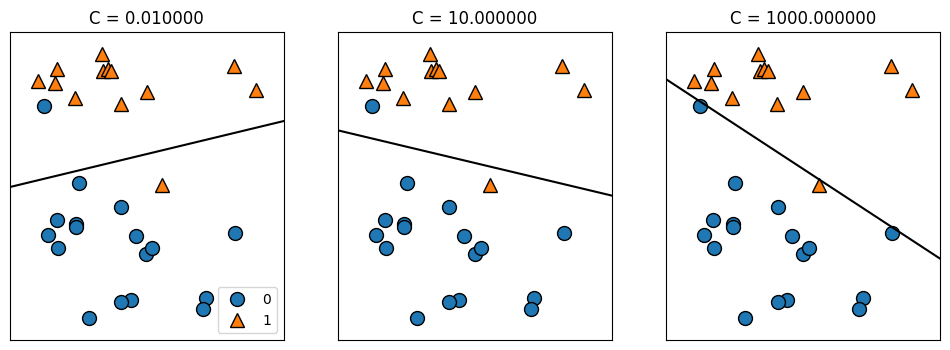

In [24]:
"""
     对于 LogisticRegression 和 LinearSVC，决定正则化强度的权衡参数叫作 C。
     C 值越大，对应的正则化越弱。
     换句话说，如果参数 C 值较大，那么 LogisticRegression 和 LinearSVC 将尽可能将 训练集 拟合到最好，
     而如果 C 值较小，那么模型更强调使系数向量（w）接近于 0。
     参数 C 的作用还有另一个有趣之处。
     较小的 C 值可以让算法尽量适应“大多数”数据点，而较大的 C 值更强调每个数据点都分类正确的重要性。
     下面是使用 LinearSVC 的图示：
""" 
mglearn.plots.plot_linear_svc_regularization()

In [25]:
"""
     在左侧的图中，C 值很小，对应强正则化。
     大部分属于类别 0 的点都位于底部，大部分属于类别 1 的点都位于顶部。
     强正则化的模型会选择一条相对水平的线，有两个点分类错误。
     在中间的图中，C 值稍大，模型更关注两个分类错误的样本，使决策边界的斜率变大。
     
     最后，在右侧的图中，模型的 C 值非常大，使得决策边界的斜率也很大，现在模型对类别 0 中所有点的分类都是正确的。
     类别 1 中仍有一个点分类错误，这是因为对这个数据集来说，不可能用一条直线将所有点都分类正确。
     右侧图中的模型尽量使所有点的分类都正确，但可能无法掌握类别的整体分布。
     换句话说，这个模型很可能过拟合。
"""

"""
     与回归的情况类似，用于分类的线性模型在低维空间中看起来可能非常受限，决策边界只能是直线或平面。
     同样，在高维空间中，用于分类的线性模型变得非常强大，当考虑更多特征时，避免过拟合变得越来越重要。
     我们在乳腺癌数据集上详细分析 LogisticRegression：
"""
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.951


D:\Leecoin\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
"""
     C=1 的默认值给出了相当好的性能，在训练集和测试集上都达到 95% 的精度。
     但由于训练集和测试集的性能非常接近，所以模型很可能是欠拟合的。
     我们尝试增大 C 来拟合一个更灵活的模型：
"""
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.937


D:\Leecoin\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
"""
     使用 C=100 可以得到更高的训练集精度，也得到了稍高的测试集精度，这也证实了我们的直觉，即更复杂的模型应该性能更好。
     我们还可以研究使用正则化更强的模型时会发生什么。
     设置 C=0.01：
"""
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


D:\Leecoin\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


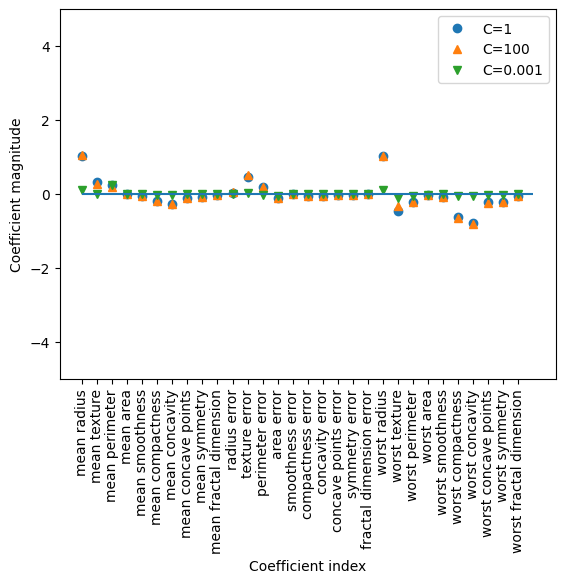

In [37]:
"""
     正如我们所料，在图 2-1 中将已经欠拟合的模型继续向左移动，训练集和测试集的精度都比采用默认参数时更小。
     最后，来看一下正则化参数 C 取三个不同的值时模型学到的系数
"""
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


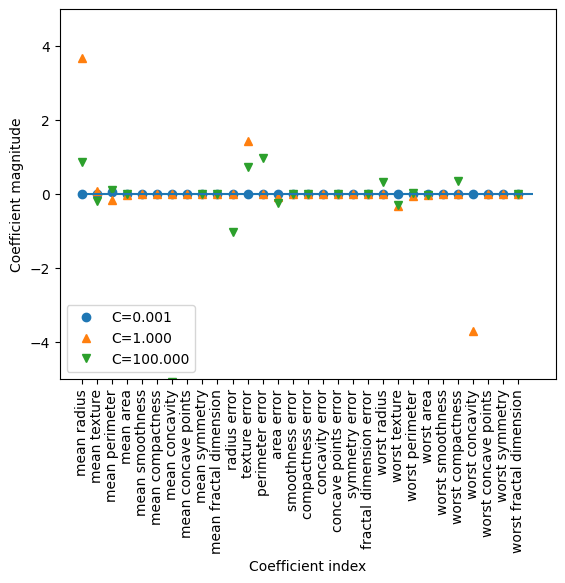

'\n    如你所见，用于二分类的线性模型与用于回归的线性模型有许多相似之处。\n    与用于回归的线性模型一样，模型的主要差别在于 penalty 参数，这个参数会影响正则化，也会影响模型是使用所有可用特征还是只选择特征的一个子集。\n'

In [29]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

'''
    如你所见，用于二分类的线性模型与用于回归的线性模型有许多相似之处。
    与用于回归的线性模型一样，模型的主要差别在于 penalty 参数，这个参数会影响正则化，也会影响模型是使用所有可用特征还是只选择特征的一个子集。
'''

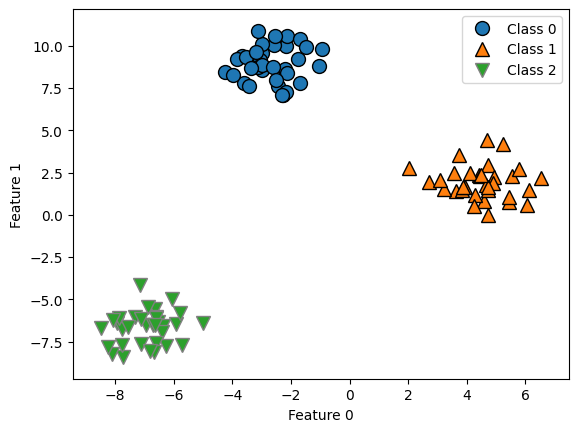

In [30]:
"""
    6.用于多分类的线性模型
    许多线性分类模型只适用于二分类问题，不能轻易推广到多类别问题（除了 Logistic 回归）。
    将二分类算法推广到多分类算法的一种常见方法是“一对其余”（one-vs.-rest）方法。
    在“一对其余”方法中，对每个类别都学习一个二分类模型，将这个类别与所有其他类别尽量分开，这样就生成了与类别个数一样多的二分类模型。
    在测试点上运行所有二类分类器来进行预测。
    在对应类别上分数最高的分类器“胜出”，将这个类别标签返回作为预测结果。
"""
"""
    每个类别都对应一个二类分类器，这样每个类别也都有一个系数（w）向量和一个截距（b）。
    下面给出的是分类置信方程，其结果中最大值对应的类别即为预测的类别标签：
        w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b
    多分类 Logistic 回归背后的数学与“一对其余”方法稍有不同，但它也是对每个类别都有一个系数向量和一个截距，也使用了相同的预测方法。
    我们将“一对其余”方法应用在一个简单的三分类数据集上。
    我们用到了一个二维数据集，每个类别的数据都是从一个高斯分布中采样得出的。
"""
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [31]:
"""
    现在，在这个数据集上训练一个 LinearSVC 分类器：
"""
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)
"""
    我们看到，coef_ 的形状是 (3, 2)，说明 coef_ 每行包含三个类别之一的系数向量，每列包含某个特征（这个数据集有 2 个特征）对应的系数值。
    现在 intercept_ 是一维数组，保存每个类别的截距。
"""

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


D:\Leecoin\Python\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


'\n    我们看到，coef_ 的形状是 (3, 2)，说明 coef_ 每行包含三个类别之一的系数向量，每列包含某个特征（这个数据集有 2 个特征）对应的系数值。\n    现在 intercept_ 是一维数组，保存每个类别的截距。\n'

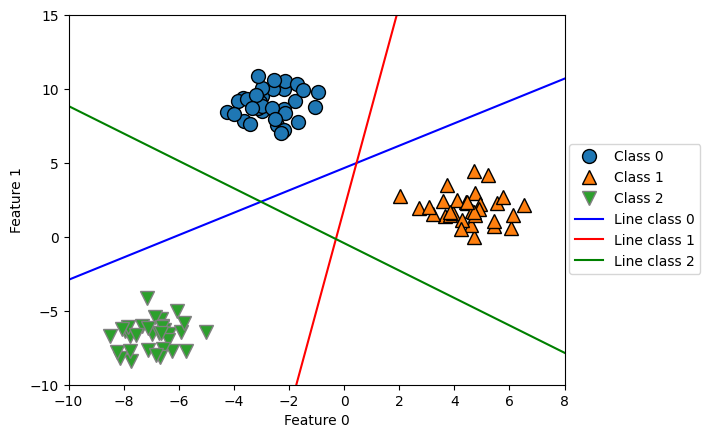

In [32]:
"""
    我们将这 3 个二类分类器给出的直线可视化（图 2-20）：
"""
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
     'Line class 2'], loc=(1.01, 0.3))

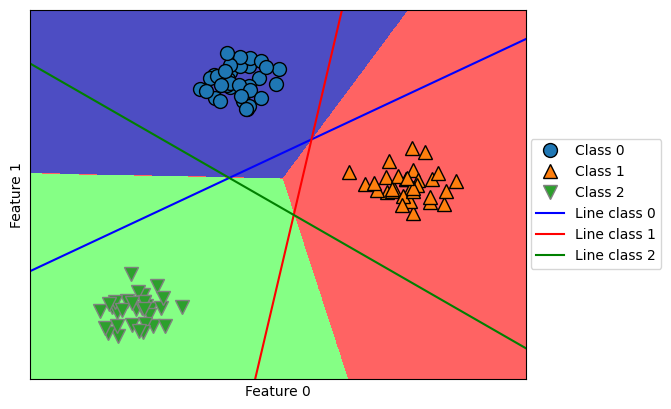

In [33]:
"""
    你可以看到，训练集中所有属于类别 0 的点都在与类别 0 对应的直线上方，这说明它们位于这个二类分类器属于“类别 0”的那一侧。
    属于类别 0 的点位于与类别 2 对应的直线上方，这说明它们被类别 2 的二类分类器划为“其余”。
    属于类别 0 的点位于与类别 1 对应的直线左侧，这说明类别 1 的二元分类器将它们划为“其余”。
    因此，这一区域的所有点都会被最终分类器划为类别 0（类别 0 的分类器的分类置信方程的结果大于 0，其他两个类别对应的结果都小于 0）。
    但图像中间的三角形区域属于哪一个类别呢，3 个二类分类器都将这一区域内的点划为“其余”。
    
    这里的点应该划归到哪一个类别呢？
    答案是分类方程结果最大的那个类别，即最接近的那条线对应的类别。
    下面的例子（图 2-21）给出了二维空间中所有区域的预测结果：
"""
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
     'Line class 2'], loc=(1.01, 0.3))
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")


In [34]:
"""
    7. 优点、缺点和参数
        线性模型的主要参数是 正则化 参数，在回归模型中叫作 alpha，在 LinearSVC 和 Logistic Regression 中叫作 C。
        alpha 值较大或 C 值较小，说明模型比较简单。
        特别是对于回归模型而言，调节这些参数非常重要。
        通常在对数尺度上对 C 和 alpha 进行搜索。
        
        你还需要确定的是用 L1 正则化还是 L2 正则化。
        如果你假定只有几个特征是真正重要的，那么你应该用 L1 正则化，否则应默认使用 L2 正则化。
        如果模型的可解释性很重要的话，使用 L1 也会有帮助。
        由于 L1 只用到几个特征，所以更容易解释哪些特征对模型是重要的，以及这些特征的作用。
        线性模型的训练速度非常快，预测速度也很快。
        这种模型可以推广到非常大的数据集，对稀疏数据也很有效。
    
        如果你的数据包含数十万甚至上百万个样本，你可能需要研究如何使用 LogisticRegression 和 Ridge 模型的 solver='sag' 选项，在处理大型数据时，这一选项比默认值要更快。
        其他选项还有 SGDClassifier 类和 SGDRegressor 类，它们对本节介绍的线性模型实现了可扩展性更强的版本。
        
        线性模型的另一个优点在于，利用我们之间见过的用于回归和分类的公式，理解如何进行预测是相对比较容易的。
        不幸的是，往往并不完全清楚系数为什么是这样的。
        如果你的数据集中包含高度相关的特征，这一问题尤为突出。
        在这种情况下，可能很难对系数做出解释。
        
        如果特征数量大于样本数量，线性模型的表现通常都很好。
        它也常用于非常大的数据集，只是因为训练其他模型并不可行。
        但在更低维的空间中，其他模型的泛化性能可能更好。
"""

"\n    7. 优点、缺点和参数\n        线性模型的主要参数是 正则化 参数，在回归模型中叫作 alpha，在 LinearSVC 和 Logistic Regression 中叫作 C。\n        alpha 值较大或 C 值较小，说明模型比较简单。\n        特别是对于回归模型而言，调节这些参数非常重要。\n        通常在对数尺度上对 C 和 alpha 进行搜索。\n        \n        你还需要确定的是用 L1 正则化还是 L2 正则化。\n        如果你假定只有几个特征是真正重要的，那么你应该用 L1 正则化，否则应默认使用 L2 正则化。\n        如果模型的可解释性很重要的话，使用 L1 也会有帮助。\n        由于 L1 只用到几个特征，所以更容易解释哪些特征对模型是重要的，以及这些特征的作用。\n        线性模型的训练速度非常快，预测速度也很快。\n        这种模型可以推广到非常大的数据集，对稀疏数据也很有效。\n    \n        如果你的数据包含数十万甚至上百万个样本，你可能需要研究如何使用 LogisticRegression 和 Ridge 模型的 solver='sag' 选项，在处理大型数据时，这一选项比默认值要更快。\n        其他选项还有 SGDClassifier 类和 SGDRegressor 类，它们对本节介绍的线性模型实现了可扩展性更强的版本。\n        \n        线性模型的另一个优点在于，利用我们之间见过的用于回归和分类的公式，理解如何进行预测是相对比较容易的。\n        不幸的是，往往并不完全清楚系数为什么是这样的。\n        如果你的数据集中包含高度相关的特征，这一问题尤为突出。\n        在这种情况下，可能很难对系数做出解释。\n        \n        如果特征数量大于样本数量，线性模型的表现通常都很好。\n        它也常用于非常大的数据集，只是因为训练其他模型并不可行。\n        但在更低维的空间中，其他模型的泛化性能可能更好。\n"

In [35]:
"""
    方法链：
    scikit-learn 中所有模型的 fit 方法返回的都是 self。这允许你像下面这样编写代码：
            # 用一行代码初始化模型并拟合
            logreg = LogisticRegression().fit(X_train, y_train)
    这里我们利用 fit 的返回值（即 self）将训练后的模型赋值给变量 logreg。
    
    这种方法调用的拼接（先调用 __init__，然后调用 fit）被称为方法链（method chaining）。
    scikit-learn 中方法链的另一个常见用法是在一行代码中同时 fit 和 predict：
            logreg = LogisticRegression() 
            y_pred = logreg.fit(X_train, y_train).predict(X_test)
            
    最后，你甚至可以在一行代码中完成模型初始化、拟合和预测：
            y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
    不过这种非常简短的写法并不完美。
    一行代码中发生了很多事情，可能会使代码变得难以阅读。
    此外，拟合后的回归模型也没有保存在任何变量中，所以我们既不能查看它也不能用它来预测其他数据。
"""

'\n    方法链：\n    scikit-learn 中所有模型的 fit 方法返回的都是 self。这允许你像下面这样编写代码：\n            # 用一行代码初始化模型并拟合\n            logreg = LogisticRegression().fit(X_train, y_train)\n    这里我们利用 fit 的返回值（即 self）将训练后的模型赋值给变量 logreg。\n    \n    这种方法调用的拼接（先调用 __init__，然后调用 fit）被称为方法链（method chaining）。\n    scikit-learn 中方法链的另一个常见用法是在一行代码中同时 fit 和 predict：\n            logreg = LogisticRegression() \n            y_pred = logreg.fit(X_train, y_train).predict(X_test)\n            \n    最后，你甚至可以在一行代码中完成模型初始化、拟合和预测：\n            y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)\n    不过这种非常简短的写法并不完美。\n    一行代码中发生了很多事情，可能会使代码变得难以阅读。\n    此外，拟合后的回归模型也没有保存在任何变量中，所以我们既不能查看它也不能用它来预测其他数据。\n'